<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 1.0, 'Median value of owner-occupied homes in thousands$')

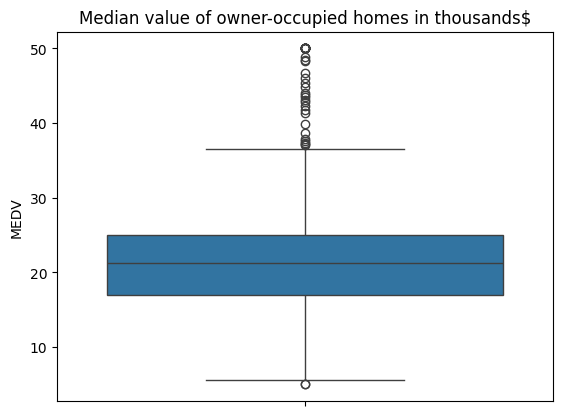

In [112]:
#A boxplot of Median value of owner-occupied homes in thousands$

sns.boxplot(data=boston_df, y=boston_df.MEDV).set_title('Median value of owner-occupied homes in thousands$' )

### We will examine if there is a significant difference in median value of houses bounded by the Charles river or not using a t-test for independent samples

The hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in Median value of owner-occupied homes close to the Charles river and not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference Median value of owner-occupied homes close to the Charles river and not")

#### We plot a barplot

Text(0, 0.5, 'Median value of owner-occupied homes')

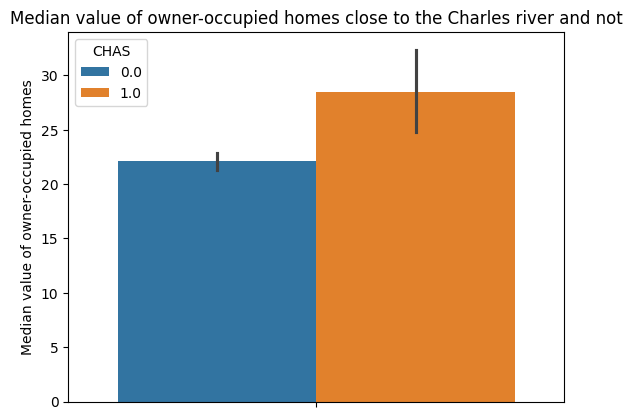

In [114]:
#A  bar plot for the Charles river variable

ax = sns.barplot(data=boston_df, y=boston_df.MEDV, hue=boston_df.CHAS)
ax.set_title('Median value of owner-occupied homes close to the Charles river and not')
ax.set_ylabel('Median value of owner-occupied homes')

#### First we use the Levene's Test in Python to check test significance

In [116]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center= 'median')

# since the p-value is lower than 0.05 the variables are not equal

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

#### Then we use the ttest_ind from the scipy_stats library

In [105]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median value of owner-occupied homes close to the Charles river and not

### We will examine if there is a difference in median values of houses of each proportion of owner-occupied units built before 1940 using ANOVA and we seperate into 3 age groups

The hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


#### We plot a boxplot for the different age groups

Text(0.5, 1.0, 'Median value of owner-occupied homes vs age')

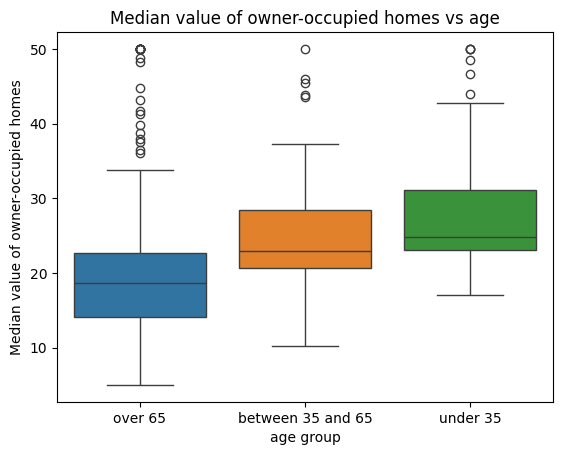

In [106]:
boston_df.loc[boston_df['AGE'] < 35, 'age group'] = 'under 35'
boston_df.loc[(boston_df['AGE'] >= 35)&(boston_df['AGE'] <= 65) , 'age group'] = 'between 35 and 65'
boston_df.loc[boston_df['AGE'] > 65, 'age group'] = 'over 65'
ax = sns.boxplot(data=boston_df, y=boston_df.MEDV, x=boston_df['age group'], hue=boston_df['age group'])
ax.set_ylabel('Median value of owner-occupied homes')
ax.set_title('Median value of owner-occupied homes vs age')

#### Test for equality of variance

In [81]:
under35 = boston_df[boston_df['age group'] == 'under 35']['MEDV']
between35and65 = boston_df[boston_df['age group'] == 'between 35 and 65']['MEDV']
over65 = boston_df[boston_df['age group'] == 'over 65']['MEDV']

In [118]:
scipy.stats.levene(under35, between35and65, over65, center='mean')

## since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=1.772948650457617, pvalue=0.17089111724406852)

#### Then run a one-way ANOVA

In [82]:
f_statistic, p_value = scipy.stats.f_oneway(under35, between35and65, over65)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 33.95447878830464, P-Value: 1.4715792920118095e-14


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ. And as we can see from the boxplot the median value of owner-occupied homes decreases with age.

### We will examine if there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

The hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


#### Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

Text(0.5, 1.0, ' Nitric oxide concentrations vs proportion of non-retail business acres per town')

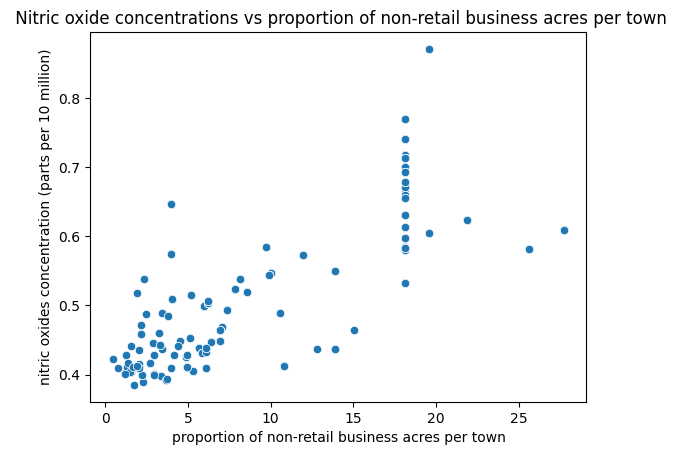

In [107]:
ax = sns.scatterplot(data=boston_df, y=boston_df.NOX, x=boston_df.INDUS)
ax.set_ylabel('nitric oxides concentration (parts per 10 million)')
ax.set_xlabel( 'proportion of non-retail business acres per town')
ax.set_title(' Nitric oxide concentrations vs proportion of non-retail business acres per town')

In [108]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  beauty and teaching evaluation score. And as we can see the nitric oxides concentration increases with the proportion of non-retail business acres per town

#### We create a histogram for the pupil to teacher ratio variable

Text(0.5, 0, 'pupil-teacher ratio by town')

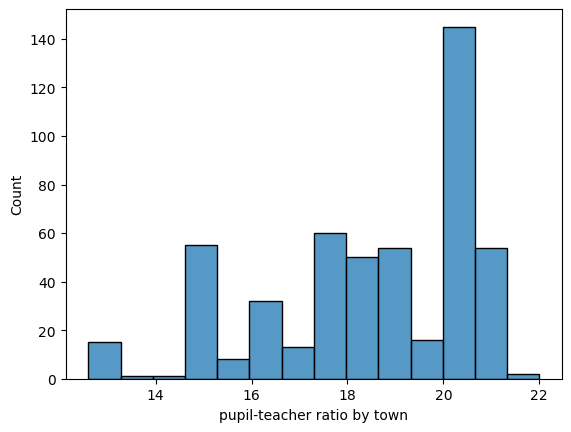

In [110]:
ax = sns.histplot(data=boston_df,x=boston_df.PTRATIO)
ax.set_xlabel( 'pupil-teacher ratio by town')

### We examine the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes ussing Regression analysis

The hypothesis:

*   $H\_0:$ median value of owner occupied homes is not correlated with the weighted distance to the five Boston employment centres
*   $H\_1:$ median value of owner occupied homes is correlated with the weighted distance to the five Boston employment centres

In [86]:
X = boston_df['MEDV']
y = boston_df['DIS']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        17:56:14   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p is lower than 0.05 so there is evidence of correlation the five Boston employment centres and the median value of owner occupied homes. 